In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [40]:
def get_proba_u_prime_u(alpha):
    u_plus = np.cos(alpha/2)**2
    u_minus = np.sin(alpha/2)**2
    return u_plus, u_minus

def sample_measurement(alpha, nsamples=10000):
    u_plus, _ = get_proba_u_prime_u(alpha)
    samples = stats.bernoulli.rvs(u_plus, size=nsamples)
    samples = np.array(samples, dtype=np.float64)
    samples[samples == 1] = 1/2
    samples[samples == 0] = -1/2
    return samples

@np.vectorize
def get_mean_from_sample(alpha, nsamples=10000):
    samples = sample_measurement(alpha, nsamples)
    return np.mean(samples)

@np.vectorize
def get_mean_and_std_from_sample(alpha, nsamples=10000):
    samples = sample_measurement(alpha, nsamples)
    return np.mean(samples), np.std(samples)

In [32]:
alpha = np.pi/2
u_plus, u_minus = get_proba_u_prime_u(alpha)
nsamples = 1000

samples =sample_measurement(alpha, nsamples)

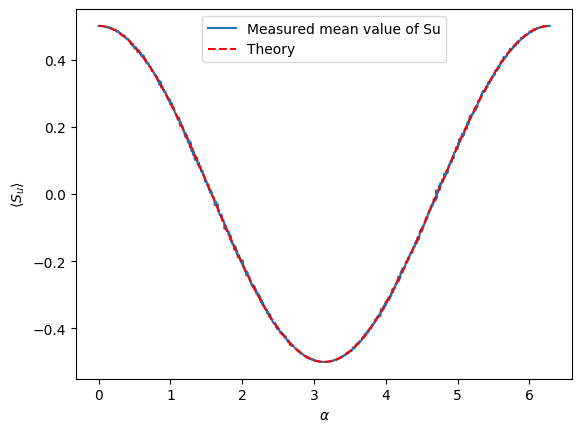

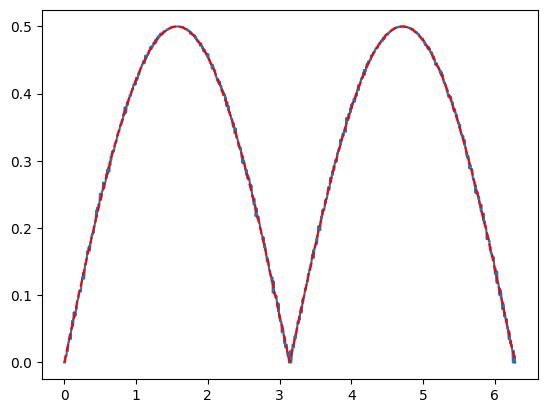

In [54]:
alpha = np.linspace(0, 2*np.pi, 1000)

mean, std = get_mean_and_std_from_sample(alpha)

plt.figure()

plt.plot(alpha, mean, label="Measured mean value of Su")
plt.plot(alpha, 0.5*np.cos(alpha), label="Theory", ls='--', c='r')

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\langle S_u \rangle$")
plt.legend()

plt.show()

plt.figure()

plt.plot(alpha, std)
plt.plot(alpha, np.sqrt(1/4*(1-np.cos(alpha)**2)), ls='--', c='r')

plt.show()